In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Data from goniometer measurements with the other axis set to 0 degrees ##

# Axis 0
a0_dists = [-8.5, -7.5, -6.5, -5.5, -4.5, -3.5, -2.5, -1.5, -0.5, 0.0,
            0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]
a0_angles = [-1.538, -1.356, -1.168, -0.980, -0.798, -0.614, -0.436, -0.258, -0.084, 0.004,
             0.090, 0.260, 0.428, 0.596, 0.760, 0.924, 1.084, 1.242, 1.394]

# Axis 1
a1_dists = [-8.5, -7.5, -6.5, -5.5, -4.5, -3.5, -2.5, -1.5, -0.5, 0.0,
            0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]
a1_angles = [-1.520, -1.356, -1.152, -0.968, -0.786, -0.608, -0.432, -0.254, -0.082, 0.004,
             0.090, 0.260, 0.428, 0.594, 0.758, 0.922, 1.082, 1.242, 1.400]

Axis 0: θ = -8.2272675152e-06 x^3 + -1.0540831717e-03 x^2 + 1.7333195018e-01 x + 3.1949103528e-03
Axis 1: θ = 6.8512785231e-06 x^3 + -9.5628210798e-04 x^2 + 1.7177056100e-01 x + 4.4904569115e-03


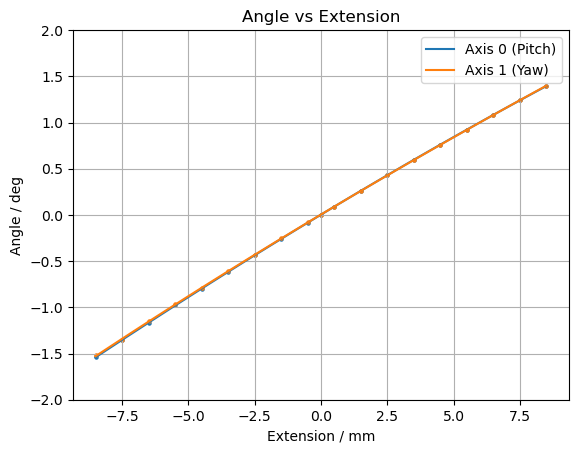

Axis 0: x = 2.3528695408e-02 θ^3 + 2.0798624661e-01 θ^2 + 5.7682200693e+00 θ + -1.9684032762e-02
Axis 1: x = 3.2429296715e-03 θ^3 + 1.8836609805e-01 θ^2 + 5.8214626751e+00 θ + -2.6323870197e-02


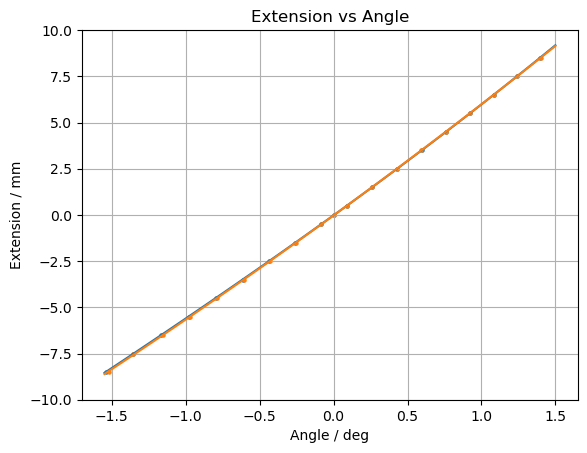

In [3]:
# Fit a polynomial to the data
a0_poly = np.polyfit(a0_dists, a0_angles, 3)
a1_poly = np.polyfit(a1_dists, a1_angles, 3)

# Plot the polynomial
a0_poly_x = np.linspace(-8.5, 8.5, 100)
a0_poly_y = np.polyval(a0_poly, a0_poly_x)
a1_poly_x = np.linspace(-8.5, 8.5, 100)
a1_poly_y = np.polyval(a1_poly, a1_poly_x)

# Print the polynomial
print(f'Axis 0: θ = {a0_poly[0]:.10e} x^3 + {a0_poly[1]:.10e} x^2 + {a0_poly[2]:.10e} x + {a0_poly[3]:.10e}')
print(f'Axis 1: θ = {a1_poly[0]:.10e} x^3 + {a1_poly[1]:.10e} x^2 + {a1_poly[2]:.10e} x + {a1_poly[3]:.10e}')

plt.title('Angle vs Extension')
plt.scatter(a0_dists, a0_angles, s=5)
plt.scatter(a1_dists, a1_angles, s=5)
plt.plot(a0_poly_x, a0_poly_y, color='C0', label='Axis 0 (Pitch)')
plt.plot(a1_poly_x, a1_poly_y, color='C1', label='Axis 1 (Yaw)')
plt.xlabel('Extension / mm')
plt.ylabel('Angle / deg')
plt.ylim(-2, 2)
plt.grid()
plt.legend()
plt.show()

# Fit an inverse polynomial to the data
a0_inv_poly = np.polyfit(a0_angles, a0_dists, 3)
a1_inv_poly = np.polyfit(a1_angles, a1_dists, 3)

# Plot the inverse polynomial
a0_inv_poly_x = np.linspace(-1.55, 1.5, 100)
a0_inv_poly_y = np.polyval(a0_inv_poly, a0_inv_poly_x)
a1_inv_poly_x = np.linspace(-1.55, 1.5, 100)
a1_inv_poly_y = np.polyval(a1_inv_poly, a1_inv_poly_x)

# Print the inverse polynomial
print(f'Axis 0: x = {a0_inv_poly[0]:.10e} θ^3 + {a0_inv_poly[1]:.10e} θ^2 + {a0_inv_poly[2]:.10e} θ + {a0_inv_poly[3]:.10e}')
print(f'Axis 1: x = {a1_inv_poly[0]:.10e} θ^3 + {a1_inv_poly[1]:.10e} θ^2 + {a1_inv_poly[2]:.10e} θ + {a1_inv_poly[3]:.10e}')

plt.title('Extension vs Angle')
plt.scatter(a0_angles, a0_dists, s=5)
plt.scatter(a1_angles, a1_dists, s=5)
plt.plot(a0_inv_poly_x, a0_inv_poly_y, color='C0')
plt.plot(a1_inv_poly_x, a1_inv_poly_y, color='C1')
plt.xlabel('Angle / deg')
plt.ylabel('Extension / mm')
plt.ylim(-10, 10)
plt.grid()
plt.show()